# Question 1 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups. 

### 1. Import the necessary modules

In [147]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

path = '/Users/praneethsai/Documents/projects/ML-fundamentals/Week 2/Clustering Assignment/segmentation data.csv'

### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [148]:
customers = pd.read_csv(path)
customers.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [149]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

In [150]:
customers.drop(columns=['ID'], inplace=True)

In [151]:
std_age = StandardScaler()
std_income = StandardScaler()

In [152]:
customers['Income'] = std_income.fit_transform(np.array(customers['Income']).reshape(1, -1))[0]
customers['Age'] = std_age.fit_transform(np.array(customers['Age']).reshape(1, -1))[0]

### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

In [153]:
customers = np.array(customers)

In [154]:
def Cost(assignment ,centers):
    cost = 0
    n = len(customers)
    for i in range(n):
        cost += np.sum(np.square(customers[i]-centers[assignment[i]]))
    cost/=n
    return cost

Text(0.5, 1.0, 'Elbow Method')

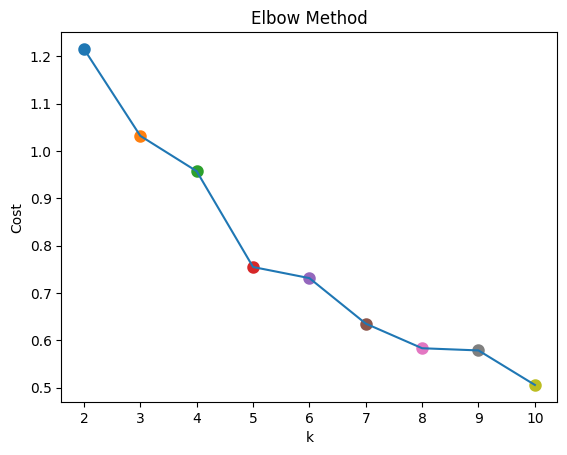

In [155]:
K = np.arange(2, 11)
costs = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(customers)
    assignment = kmeans.predict(customers)
    centers = kmeans.cluster_centers_
    cost = Cost(assignment, centers)
    costs.append(cost)
    plt.scatter(k, cost, linewidths=3)
plt.plot(K, costs)
plt.ylabel('Cost')
plt.xlabel('k')    
plt.title('Elbow Method')


Text(0.5, 1.0, 'Using silhoutte score')

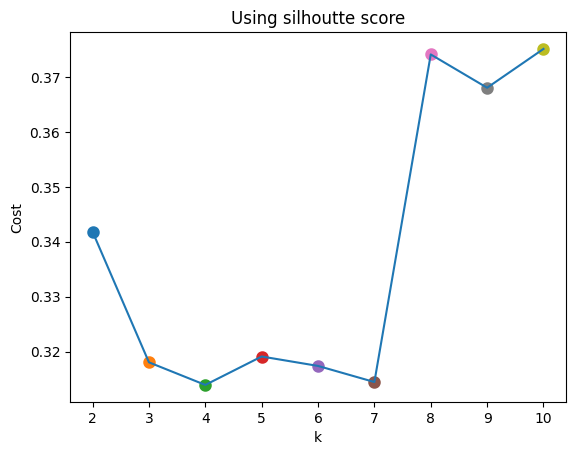

In [156]:
# Using Silhoutte score
from sklearn.metrics import silhouette_score

K = np.arange(2, 11)
scores = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(customers)
    assignment = kmeans.predict(customers)
    centers = kmeans.cluster_centers_
    score = silhouette_score(customers, assignment)
    scores.append(score)
    plt.scatter(k, score, linewidths=3)
plt.plot(K, scores)
plt.ylabel('Cost')
plt.xlabel('k')    
plt.title('Using silhoutte score')

In [ ]:
# Silhoutte score suggests more than 7
# Elbow method suggests 5

### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

In [157]:
kmeans_opt = KMeans(n_clusters=4)
kmeans_opt.fit(customers)
assignment_opt = kmeans_opt.predict(customers)
centers_opt = kmeans_opt.cluster_centers_

### 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

In [158]:
from sklearn.cluster import DBSCAN


in_score = -2
epsilons = [i/10 for i in range(1, 10)]
min_samples = [3, 4, 5, 6]
for epsilon in epsilons:
    for min_sample in min_samples:
        dbscan = DBSCAN(min_samples=min_sample, eps=epsilon)
        assignment = dbscan.fit_predict(customers)
        score = silhouette_score(customers, assignment)
        if score > in_score:
            e = epsilon ; s = min_sample
            in_score = score


In [159]:
dbscan = DBSCAN(min_samples=s, eps=e)
predicted = dbscan.fit_predict(customers)
print('silhoutte score', silhouette_score(customers, predicted))

silhoutte score 0.9800628772829645
